## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Import libraries and data

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [86]:
df = pd.read_csv("data/kc_house_data.csv")

In [178]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,8,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,8,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,9,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0,0,...,1,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,0,...,8,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0,0,...,9,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,9,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,9,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,8,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [105]:
df = df.dropna()

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  uint8  
 9   view           15762 non-null  int8   
 10  condition      15762 non-null  int8   
 11  grade          15762 non-null  int8   
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [107]:
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [108]:
pd.get_dummies(df['waterfront']).tail()

,NO,YES
21591,1,0
21592,1,0
21593,1,0
21594,1,0
21596,1,0


In [115]:
df['waterfront'] = pd.get_dummies(df['waterfront'], drop_first = True)

<ipython-input-115-31b0bf79b242>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['waterfront'] = pd.get_dummies(df['waterfront'], drop_first = True)


In [167]:
df['view'].unique()

['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR']
Categories (5, object): ['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR']

In [168]:
df['view'] = df['view'].astype('category')

<ipython-input-168-fa85339b8fcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view'] = df['view'].astype('category')


In [169]:
df['view'] = df['view'].cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])

<ipython-input-169-deece11c3f85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view'] = df['view'].cat.reorder_categories(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'])


In [176]:
df['view'] = df['view'].cat.codes

<ipython-input-176-59a17340542c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['view'] = df['view'].cat.codes


In [185]:
df['condition'].unique()

[2, 4, 3, 0, 1]
Categories (5, int64): [2, 4, 3, 0, 1]

In [186]:
df['condition'] = df['condition'].astype('category')

<ipython-input-186-0290f567fca9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition'] = df['condition'].astype('category')


In [187]:
df['condition'] = df['condition'].cat.codes

<ipython-input-187-7ff86a9e77bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition'] = df['condition'].cat.codes


In [189]:
df['condition']

1        2
3        4
4        2
5        2
6        2
        ..
21591    2
21592    2
21593    2
21594    2
21596    2
Name: condition, Length: 15762, dtype: int8

In [199]:
df['grade'].unique()

array([ 8,  9,  1, 10,  7,  6,  0,  2,  5,  4,  3], dtype=int8)

In [201]:
df['grade'] = df['grade'].astype('category')

<ipython-input-201-cf3df0aa44dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade'] = df['grade'].astype('category')


In [202]:
df['grade'] = df['grade'].cat.codes

<ipython-input-202-1a15624ffed8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade'] = df['grade'].cat.codes


In [203]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,8,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,8,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,9,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0,0,...,1,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,0,...,8,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0,0,...,9,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,9,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,9,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,8,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [177]:
df['view']

1        0
3        0
4        0
5        0
6        0
        ..
21591    0
21592    0
21593    0
21594    0
21596    0
Name: view, Length: 15762, dtype: int8

In [193]:
df.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          uint8
view                 int8
condition            int8
grade            category
sqft_above          int64
sqft_basement      object
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
dtype: object

In [196]:
df['condition'].value_counts()

2    10221
3     4137
4     1254
1      131
0       19
Name: condition, dtype: int64

In [117]:
from statsmodels.formula.api import ols

In [ ]:
# 49% of the variance in the price can be explained by sq ft of living space.
# a sq ft increase is associated with $280.86 in price

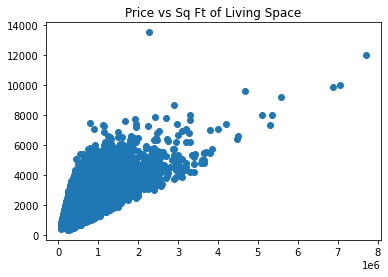

In [39]:
plt.scatter(df.price, df.sqft_living)
plt.title("Price vs Sq Ft of Living Space")
plt.show()

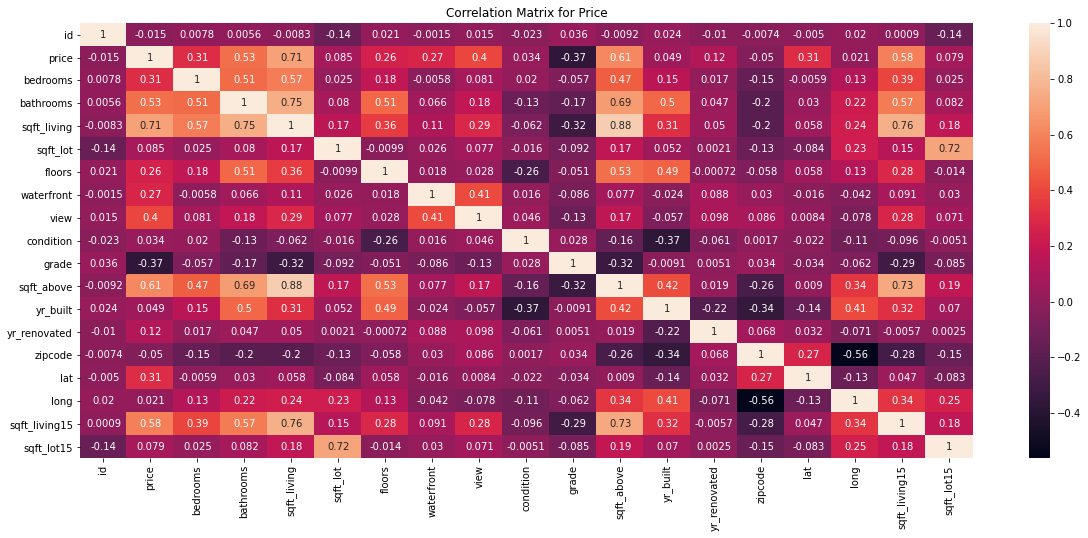

In [204]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True)

plt.title('Correlation Matrix for Price')
plt.show()

In [ ]:
# Correlated variables:
# - 

multi_formula = 'price ~ sqft_living + bathrooms + bedrooms'
multi_model = ols(multi_formula, df).fit()
multi_summary = multi_model.summary()
multi_summary

In [65]:
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
splitter = ShuffleSplit(n_splits=2, test_size=.20, random_state=0)